<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/7_7_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv('loan_sanction_train.csv', sep =',')
df.head() #mostra solo le prime 5 righe. se metto head(10) le prime 10...

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Quante sono le istanze contenute nel dataset? Il dataset è completo (cioè per ogni
istanza tutti i valori di ogni attributo sono sempre correttamente specificati non esistono
"missing values")? Il dataset è bilanciato per quanto riguarda la classe da predire?

In [126]:
print(f'Numero righe: {df.shape[0]}') #il numero di istanze è il numero di righe
print(f'Numero colonne: {df.shape[1]}') #numero di classi

Numero righe: 614
Numero colonne: 13


In [127]:
df.isnull().sum() #ci sono missing values per più istanze

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [128]:
df['Loan_Status'].value_counts() #il dataset non è bilanciato. il numero di persone che sono riuscite ad estinguere il prestito è oltre 400 mentre il numero di istanze in cui non si è riuscito ad estingurlo è meno di 200

,count
Loan_Status,
Y,422
N,192


Verificare se in generale le persone con la laurea (Education = "Graduate") hanno più
difficoltà a restituire il prestito rispetto a quelle senza (punti 2).

Realizzare una pivot
table attraverso la quale mostrare quanti sono gli uomini / donne (sulle righe), con /
senza laurea (colonne) e individuare per ognuna di queste categorie la percentuale di
persone che non sono in grado di restituire il prestito. L'essere laureato incide
diversamente nei due generi?

In [129]:
df["Loan_Status_mapped"] = df["Loan_Status"].map({"Y":1,"N":0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_mapped
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,1


In [130]:
df.groupby('Education')['Loan_Status_mapped'].mean() #si può osservare che in media le persone NON laureate hanno più difficoltà ad estinguere il prestito

,Loan_Status_mapped
Education,
Graduate,0.708333
Not Graduate,0.611940


In [131]:
df.pivot_table(
    values='Loan_Status_mapped',
    index='Gender',
    columns='Education',
    aggfunc='mean'
)

#apparentemente per le donne l'essere o meno laureata influscie meno sulla capacità di estinguere il prestito. addirittura è più probabile che lo estingua una donna non laureata
#per quanto riguarda gli uomini il distacco si aplia con un 72% di uomini laureati che lo riesce ad estinguere contro un 60% per quelli non laureati

Education,Graduate,Not Graduate
Gender,,
Female,0.663043,0.70000
Male,0.720745,0.60177


Ci si aspetta che l'ammontare del prestito (Loan
_
Amount) concesso abbia una qualche
relazione con la durata del prestito (Loan
_
Amount
_
Term). Calcolare il rapporto tra le
due grandezze e fare un grafico della distribuzione dei valori (punti 3).

In [132]:
import matplotlib.pyplot as plt

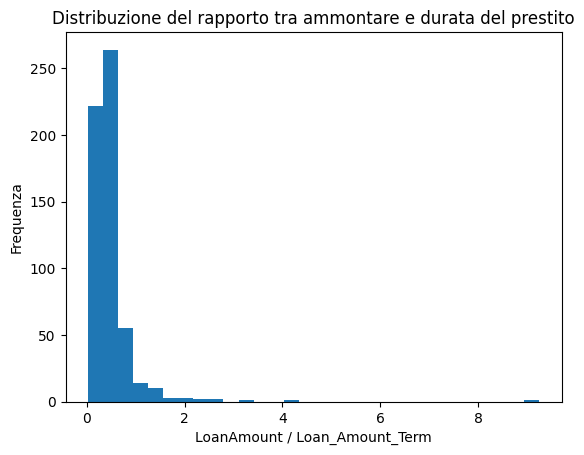

In [133]:
df["Loan_Ratio"] = df["LoanAmount"] / df['Loan_Amount_Term']


plt.hist(df['Loan_Ratio'], bins=30)
plt.xlabel("LoanAmount / Loan_Amount_Term")
plt.ylabel("Frequenza")
plt.title("Distribuzione del rapporto tra ammontare e durata del prestito")
plt.show()

Ci si aspetta che sia più difficile restituire prestiti con durata più limitata. Questa
intuizione è in qualche modo supportata dai dati? Motivare la risposta (punti 2).

In [134]:
df['Loan_Amount_Term_discr'] = pd.cut(df['Loan_Amount_Term'], bins=5)

df.groupby('Loan_Amount_Term_discr')['Loan_Status_mapped'].mean()
#si può osservare che tendenzialmente dai dati non emerge questo, infatti si uò osservare che in media la fascia che tende ad estinguere meno il prestito è quella riguardante i prestiti più a lungo termine

/tmp/ipython-input-178320480.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Loan_Amount_Term_discr')['Loan_Status_mapped'].mean()


,Loan_Status_mapped
Loan_Amount_Term_discr,
"(11.532, 105.6]",0.666667
"(105.6, 199.2]",0.680851
"(199.2, 292.8]",0.750000
"(292.8, 386.4]",0.699048
"(386.4, 480.0]",0.400000


---------------------------------------
PARTE 2
--------------------------------------------

In [135]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

Si vuole predire il valore di Loan
_
status sulla base degli attributi presenti nel dataset.
Ricaricare il dataset originale, eliminare eventuali attributi inutili (giustificare la scelta),
eliminare le istanze che contengono valori nulli, rendere tutti gli attributi numerici, e
dividerlo in modo che $3/4$ degli elementi siano contenuti in un nuovo dataset "train" e
$1/4$ nel dataset "test"
.
13 Allenare il train con il modello Decision Tree e valutare
l'accuracy ottenuta calcolata sia sul dataset train sia sul dataset test. Confrontare i
risultati ottenuti con quelli ottenuti con una predizione basata sul modello KNeighbors
Classifier. Effettuare alcune considerazioni sui risultati ottenuti, tenendo in
considerazione anche l'analisi della confusion matrix e la predizione effettuata da un
dummy classifier (punti 3).
14

In [136]:
df = pd.read_csv('loan_sanction_train.csv', sep =',')
df.drop('Loan_ID',axis = 1,inplace = True) #l'id di ciascun prestito è inutile al fine della predizione, favorisce l'overfitting del modello e dunque è opportuno rimuoverlo
df.dropna(inplace=True)

le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])


df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [137]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [138]:
models = {'DecisionTree': DecisionTreeClassifier(),
          'KNC': KNeighborsClassifier(),
          'Dummy': DummyClassifier(strategy="most_frequent")
          }

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"accuracy on train {accuracy_score(trainlabels,trainpred)}")
  print(f"accuracy on test {accuracy_score(testlabels,testpred)}")
  print(f"confusion matrix on train \n {confusion_matrix(trainlabels,trainpred)}")
  print(f"confusion matrix on test \n {confusion_matrix(testlabels,testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, y_train, y_test)

  #osservando i risultati possiamo vedere che il decision tree ha un accuracy del 100% sul training set e una del 72% sul test, questo calo di performance indica che nel training
  #c'è stato overfitting, probabilmente a causa del dataset sottodimensionato
  #il knc non porta ad avere overfitting eprò osservando sia la confusion matrix che i valori dell'accuracy non perfoarma a livello del decision tree
  #infine il dummy classifier tende ad assegnare ciascuna istanza sempre alla seconda classe siccome è la più frequente, ottiene così un accuracy scarsa


 ===== DecisionTree =====
accuracy on train 1.0
accuracy on test 0.7333333333333333
confusion matrix on train 
 [[111   0]
 [  0 249]]
confusion matrix on test 
 [[27 10]
 [22 61]]
 ===== KNC =====
accuracy on train 0.75
accuracy on test 0.6333333333333333
confusion matrix on train 
 [[ 37  74]
 [ 16 233]]
confusion matrix on test 
 [[ 9 28]
 [16 67]]
 ===== Dummy =====
accuracy on train 0.6916666666666667
accuracy on test 0.6916666666666667
confusion matrix on train 
 [[  0 111]
 [  0 249]]
confusion matrix on test 
 [[ 0 37]
 [ 0 83]]


Trovare i parametri migliori del classificatore DecisionTree. Agire sui parametri criterion e
min
_
samples
_
leaf. Verificare se l'accuratezza che si ottiene con la nuova configurazione
supera quella con i parametri di default ottenuta al punto 1 (punti 4).

In [139]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf':[2,5,7,10,20]
}

gd_dt = GridSearchCV(DecisionTreeClassifier(),
                     parameters,
                     scoring='accuracy',
                     cv=5)

gd_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [2, 5, 7, 10, 20]},
             scoring='accuracy')

In [140]:
best_par = gd_dt.best_params_
best_par

{'criterion': 'gini', 'min_samples_leaf': 20}

In [141]:
best_score = gd_dt.best_score_
best_score

np.float64(0.7833333333333334)

In [142]:
best_model = gd_dt.best_estimator_
y_test_pred_best = best_model.predict(X_test)
y_train_pred_best = best_model.predict(X_train)
print(f"accuracy on train {accuracy_score(y_train, y_train_pred_best)}")
print(f"accuracy on test {accuracy_score(y_test, y_test_pred_best)}")

#le performance, migliorano. si riesce infatti a prevenire l'overfitting, come si riesce ad osservare dal valore dell'accuracy sul training e ciò
#porta ad un aumento dell'accuracy sul test set

accuracy on train 0.7972222222222223
accuracy on test 0.8416666666666667


Valutare la demographic parity del classificatore Decision Tree rispetto al valore di
Education, ovvero se la probabilità di predire 0 è la stessa nelle persone laureate e nonlaureate (punti 2).
16Valutare l'equalized odds, ovvero se l'accuratezza ottenuta nelle
persone laureate è la stessa ottenuta nelle persone non laureate (punti 2).
17
Eliminare
l'attributo Education dal train e valutare se l'accuratezza ottenuta nelle persone laureate
è la stessa ottenuta nelle persone non laureate (punti 1).

In [143]:
#considero le predizioni fatte dal decision tree allenato prima
dt = models['DecisionTree']
y_test_pred = dt.predict(X_test)


Grad_mask = X_test['Education'] == 0
No_Grad_mask   = X_test['Education'] == 1


Grad_Loan_Status_rate = y_test_pred[Grad_mask].mean()
No_Grad_Loan_Status_rate   = y_test_pred[No_Grad_mask].mean()

print(f"Percentuale predetta di loan status = 0 tra i grad: {1 - Grad_Loan_Status_rate:.2f}")
print(f"Percentuale predetta di loan status = 0 tra i non grad: {1 - No_Grad_Loan_Status_rate:.2f}")

# accuracy separata per genere
grad_acc = accuracy_score(y_test[Grad_mask], y_test_pred[Grad_mask])
no_grad_acc  = accuracy_score(y_test[No_Grad_mask], y_test_pred[No_Grad_mask])

print(f"acc per i graduate: {grad_acc:.2f}")
print(f"acc per i non grad : {no_grad_acc:.2f}")


Percentuale predetta di loan status = 0 tra i grad: 0.44
Percentuale predetta di loan status = 0 tra i non grad: 0.30
acc per i graduate: 0.71
acc per i non grad : 0.81


In [144]:
#Rimuovere education e riallenare
X_train_no_edu = X_train.drop('Education', axis=1)
X_test_no_edu  = X_test.drop('Education', axis=1)

dt_no_edu = DecisionTreeClassifier()
dt_no_edu.fit(X_train_no_edu, y_train)
y_test_pred_no_edu = dt_no_edu.predict(X_test_no_edu)

# Accuracy separata senza edu
grad_acc_no_gender = accuracy_score(y_test[Grad_mask], y_test_pred_no_edu[Grad_mask])
no_grad_acc_no_gender   = accuracy_score(y_test[No_Grad_mask], y_test_pred_no_edu[No_Grad_mask])

print(f"Accuracy donne senza gender: {grad_acc_no_gender:.2f}")
print(f"Accuracy uomini senza gender: {no_grad_acc_no_gender:.2f}")


Accuracy donne senza gender: 0.76
Accuracy uomini senza gender: 0.78


Creare una pipeline che a partire dal dataset iniziale (dopo aver tolto le colonne rimosse
al punto 1 e le colonne testuali):

usi il SimpleImputer per inserire i valori nulli (punti 1) 19

divida in 10 bins i valori di LoanAmount (punti 1) 20

applichi il DecisionTreeClassifier per effettuare la predizione (punti 1) 21

In [145]:
df = pd.read_csv('loan_sanction_train.csv', sep =',')
df.drop('Loan_ID',axis = 1,inplace = True) #l'id di ciascun prestito è inutile al fine della predizione, favorisce l'overfitting del modello e dunque è opportuno rimuoverlo


le = LabelEncoder() #fa una fit trasf solo per gli object. solo per colonne categoriche
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [146]:
#ATTENZIONE! il column trasformer ha bisogno dei nomi di colonne per funzionare siccome gli indico di applicare la trasformazione X (come il simple imputer) alla colonna A,
#necessario sapere il nome della colonna  A quindi, se però applico prima delle trasformaizoni questo sarà un array numpy, quindi non avrò più i nomi di colonna, per ovviare a
#questo c'è un secondo modo per indicare i  nomi di colonna. si utilizza l'x.train.columns.get_indexer dei nomi di colonna
col_tran = ColumnTransformer(
    transformers=[
        ('discr', KBinsDiscretizer(n_bins = 10), X_train.columns.get_indexer(['LoanAmount']))
        ],
    remainder='passthrough'#per lasciare invariati gli altri attributi
)

pipeline = Pipeline(steps=[
                              ('simple', SimpleImputer(strategy='most_frequent')),
                              ('col_tran', col_tran),
                              ('estimator', DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 20))
                             ])

pipeline

Pipeline(steps=[('simple', SimpleImputer(strategy='most_frequent')),
                ('col_tran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr',
                                                  KBinsDiscretizer(n_bins=6),
                                                  array([7]))])),
                ('estimator', DecisionTreeClassifier(min_samples_leaf=20))])

In [147]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"accuracy on test {y_acc__test_pl}") #l'accuracy che si ottiene rimane confrontabile con quella ottenuta con i migliori parametri

accuracy on test 0.8181818181818182


Creare una pipeline che a partire dal dataset iniziale (dopo aver tolto le colonne rimosse
al punto 1):

usi il SimpleImputer per inserire i valori nulli (punti 0.5) 22

trasformi in valori numerici le colonne testuali (punti 1) 23

applichi lo StandardScaler (punti 0.5) 24

applichi il DecisionTreeClassifier per effettuare la predizione (punti 1) 25

In [148]:
df = pd.read_csv('loan_sanction_train.csv', sep =',')
df.drop('Loan_ID',axis = 1,inplace = True) #l'id di ciascun prestito è inutile al fine della predizione, favorisce l'overfitting del modello e dunque è opportuno rimuoverlo

X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status'] #y è il target, test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].dtype == "object"]

numerical_cols = [cname for cname in X_train.columns if
                X_train[cname].dtype in ['int64', 'float64']]

In [149]:
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [150]:
# Trasforma le colonne testuali in colonne binarie (0/1)
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #non esiste il mean su colonne categoriche, di default la strategia è il mean
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Gestisce i nulli per le colonne numeriche
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# --- 3. ColumnTransformer ---
coltran = ColumnTransformer(transformers=[
    ("cat", cat_transformer, categorical_cols),
    ("num", num_transformer, numerical_cols)
])

# --- 4. Pipeline Finale ---
pipeline = Pipeline(steps=[
    ("preprocessing", coltran),
    ("scaler", StandardScaler()),
    ("estimator", DecisionTreeClassifier())
])
pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History'])])),
                ('scaler', StandardScaler()),
                ('estimator', DecisionTreeClassifier())])

In [151]:
pipeline.fit(X_train, y_train)
y_pred_pl = pipeline.predict(X_test)
y_acc__test_pl = accuracy_score(y_test, y_pred_pl)
print(f"accuracy on test {y_acc__test_pl}") #l'accuracy che si ottiene peggiora di circa un 5% rispetto al caso precedente

accuracy on test 0.7402597402597403


E' possibile utilizzare un regressore lineare al posto del DecisionTree? In che modo?
(punti 2).

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# riutilizziamo lo stesso preprocessing già fatto
df = pd.read_csv('loan_sanction_train.csv')
df.drop('Loan_ID', axis=1, inplace=True)
df.dropna(inplace=True)

# encoding delle variabili categoriche
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == object:
        df[col] = le.fit_transform(df[col])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']   # 0 = N, 1 = Y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# regressore lineare
lr = LinearRegression()
lr.fit(X_train, y_train)

# predizioni continue
y_pred_cont = lr.predict(X_test)

# soglia per trasformare in classificazione--> altrimenti problema di regressione che mi da probabilità comprese tra 0 e 1. con la soglia lo faccio diventare una classificazione
y_pred_class = (y_pred_cont >= 0.5).astype(int)

# valutazione
acc_lr = accuracy_score(y_test, y_pred_class)
print(f"Accuracy con regressione lineare: {acc_lr:.3f}")


Accuracy con regressione lineare: 0.842


È possibile utilizzare un regressore lineare per predire Loan_Status trasformando il problema di classificazione in un problema di regressione.
In questo caso, il valore target viene codificato come 0 o 1 e il modello di regressione lineare restituisce valori continui, interpretabili come una stima della probabilità di appartenenza alla classe positiva.
Per ottenere una classificazione finale è necessario applicare una soglia (ad esempio 0.5) alle predizioni del modello.
Tuttavia, questo approccio non è ottimale poiché la regressione lineare non è progettata per problemi di classificazione e può produrre valori al di fuori dell’intervallo [0,1]. Per questo motivo, modelli come la regressione logistica o i decision tree risultano più adatti.